# Project On Titanic Dataset

In [398]:
# Importing the librries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [399]:
# import the dataset 

df_train = pd.read_csv('train.csv')

df_test = pd.read_csv('test.csv')

In [400]:

pd.set_option('display.max_columns', None)

df_train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [401]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [402]:
print(df_train.shape)
print(df_test.shape)

(891, 12)
(418, 11)


In [403]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Filling Messing Values

In [404]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [405]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [406]:
# in the age column almost 18.86% values are missing
# add mean to fill missing values


df_train['Age'].fillna(df_train['Age'].mean(), inplace=True)
df_test['Age'].fillna(df_test['Age'].mean(), inplace=True)

df_test['Fare'].fillna(df_test['Fare'].mean(), inplace=True)

In [407]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [408]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [409]:
# in the cabin column 77% of data is missing so instead of fillinng the missing values we can simply remove it
df_train = df_train.drop('Cabin', axis=1)
df_test = df_test.drop('Cabin', axis=1)


In [410]:
df_train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [411]:
# all the Embarked values are important for us which are C-Cherbourg, Q-Queenstown, S-Southampton so we will add 
# mode for categorical values

print(df_train['Embarked'].mode())

df_train['Embarked'].fillna(df_train['Embarked'].mode()[0], inplace=True)

print(df_test['Embarked'].mode())

df_test['Embarked'].fillna(df_train['Embarked'].mode()[0], inplace=True)


0    S
dtype: object
0    S
dtype: object


In [412]:
df_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## Eploratory Data Analysis & Data Visualization

0    549
1    342
Name: Survived, dtype: int64


<AxesSubplot:xlabel='Survived', ylabel='count'>

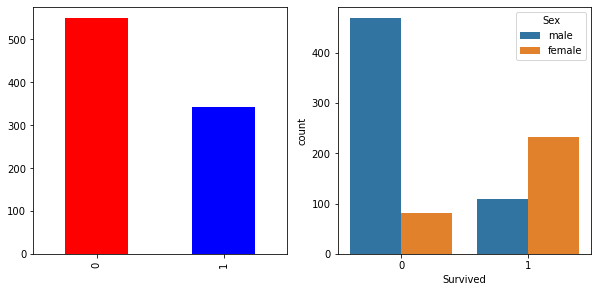

In [413]:
print(df_train['Survived'].value_counts())

plt.figure(figsize=(10, 10))
plt.subplot(2,2,1)
df_train['Survived'].value_counts().plot(kind='bar', color=['r', 'b'])

plt.subplot(2,2,2)
sns.countplot(data=df_train, x='Survived', hue='Sex')

In [414]:
#In the above visualization, it can be observed that, a higher number of males have perished as compared to females, while 
#a greater proportion of females have survived till the end.

S    646
C    168
Q     77
Name: Embarked, dtype: int64


<AxesSubplot:xlabel='Survived', ylabel='count'>

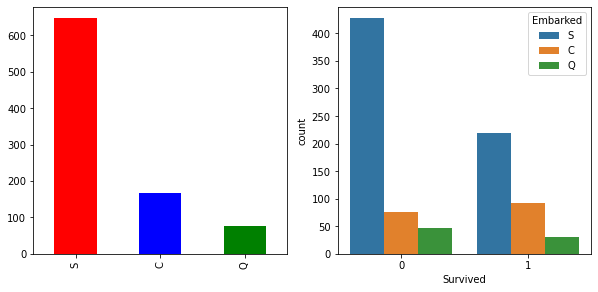

In [415]:
print(df_train['Embarked'].value_counts())

plt.figure(figsize=(10, 10))
plt.subplot(2,2,1)
df_train['Embarked'].value_counts().plot(kind='bar', color=['r', 'b', 'g'])

plt.subplot(2,2,2)
sns.countplot(data=df_train, x='Survived', hue='Embarked')

In [416]:
# In the above visualization, it can be observed that, a higher number of death was from Southampton, while 
# a greater proportion of survived from Southampton too.

3    491
1    216
2    184
Name: Pclass, dtype: int64


<AxesSubplot:xlabel='Pclass', ylabel='count'>

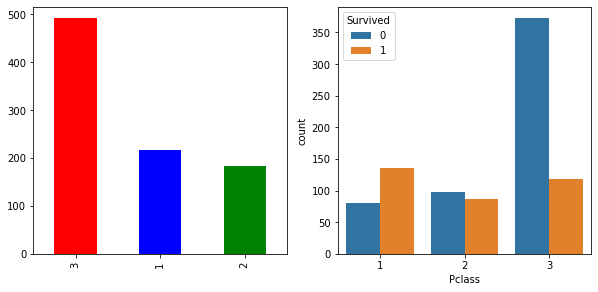

In [417]:
print(df_train['Pclass'].value_counts())

plt.figure(figsize=(10, 10))
plt.subplot(2,2,1)
df_train['Pclass'].value_counts().plot(kind='bar', color=['r', 'b', 'g'])

plt.subplot(2,2,2)
sns.countplot(data=df_train, x='Pclass', hue='Survived')

In [418]:
# In the above visualization, it can be observed that, a higher number of death was from class 3.

In [419]:

df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

## Encoding the categorical variable

In [420]:
# First scale the values of Sex 
df_train['Sex'] = df_train['Sex'].replace({'male' : 1, 'female' : 0})
df_test['Sex'] = df_train['Sex'].replace({'male' : 1, 'female' : 0})


# Second scale the values of Embarked 
df_train['Embarked'] = df_train['Embarked'].replace({'S' : 0, 'C' : 1, 'Q' : 2})
df_test['Embarked'] = df_train['Embarked'].replace({'S' : 0, 'C' : 1, 'Q' : 2})

In [421]:
df_train.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
511,512,0,3,"Webber, Mr. James",1,29.699118,0,0,SOTON/OQ 3101316,8.0500,0
764,765,0,3,"Eklund, Mr. Hans Linus",1,16.000000,0,0,347074,7.7750,0
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",0,47.000000,1,1,11751,52.5542,0
717,718,1,2,"Troutt, Miss. Edwina Celia ""Winnie""",0,27.000000,0,0,34218,10.5000,0
238,239,0,2,"Pengelly, Mr. Frederick William",1,19.000000,0,0,28665,10.5000,0
825,826,0,3,"Flynn, Mr. John",1,29.699118,0,0,368323,6.9500,2
752,753,0,3,"Vande Velde, Mr. Johannes Joseph",1,33.000000,0,0,345780,9.5000,0
712,713,1,1,"Taylor, Mr. Elmer Zebley",1,48.000000,1,0,19996,52.0000,0
856,857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",0,45.000000,1,1,36928,164.8667,0
112,113,0,3,"Barton, Mr. David John",1,22.000000,0,0,324669,8.0500,0


In [422]:
df_test.sample(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
284,1176,3,"Rosblom, Miss. Salli Helena",1,2.00000,1,1,370129,20.2125,0
358,1250,3,"O'Keefe, Mr. Patrick",0,30.27259,0,0,368402,7.7500,2
98,990,3,"Braf, Miss. Elin Ester Maria",0,20.00000,0,0,347471,7.8542,0
21,913,3,"Olsen, Master. Artur Karl",1,9.00000,0,1,C 17368,3.1708,0
269,1161,3,"Pokrnic, Mr. Mate",0,17.00000,0,0,315095,8.6625,0
402,1294,1,"Gibson, Miss. Dorothy Winifred",0,22.00000,0,1,112378,59.4000,0
316,1208,1,"Spencer, Mr. William Augustus",0,57.00000,1,0,PC 17569,146.5208,0
365,1257,3,"Sage, Mrs. John (Annie Bullen)",1,30.27259,1,9,CA. 2343,69.5500,0
144,1036,1,"Lindeberg-Lind, Mr. Erik Gustaf (Mr Edward Lin...",1,42.00000,0,0,17475,26.5500,0
238,1130,2,"Hiltunen, Miss. Marta",1,18.00000,1,1,250650,13.0000,0


In [423]:
passengerId=df_test['PassengerId'].values
passengerId

array([ 892,  893,  894,  895,  896,  897,  898,  899,  900,  901,  902,
        903,  904,  905,  906,  907,  908,  909,  910,  911,  912,  913,
        914,  915,  916,  917,  918,  919,  920,  921,  922,  923,  924,
        925,  926,  927,  928,  929,  930,  931,  932,  933,  934,  935,
        936,  937,  938,  939,  940,  941,  942,  943,  944,  945,  946,
        947,  948,  949,  950,  951,  952,  953,  954,  955,  956,  957,
        958,  959,  960,  961,  962,  963,  964,  965,  966,  967,  968,
        969,  970,  971,  972,  973,  974,  975,  976,  977,  978,  979,
        980,  981,  982,  983,  984,  985,  986,  987,  988,  989,  990,
        991,  992,  993,  994,  995,  996,  997,  998,  999, 1000, 1001,
       1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010, 1011, 1012,
       1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023,
       1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034,
       1035, 1036, 1037, 1038, 1039, 1040, 1041, 10

## Separating features & Target

In [424]:
X = df_train.drop(columns =['PassengerId', 'Name', 'Ticket', 'Survived'])
y = df_train['Survived']

In [425]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [426]:
df_test= df_train.drop(columns =['PassengerId', 'Name', 'Ticket', 'Survived'], inplace=True)

## Applying Logistic Regression 


In [427]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(Xtrain, ytrain)

LogisticRegression()

In [428]:
y_pred = lr.predict(Xtest)

In [429]:
from sklearn.metrics import accuracy_score

In [430]:
accuracy_score(y_pred, ytest)

0.8268156424581006

## Applying Decision Tree Classifier

In [437]:
from sklearn.tree import DecisionTreeClassifier

cls = DecisionTreeClassifier()

cls.fit(Xtrain, ytrain)

DecisionTreeClassifier()

In [438]:
y_pred = cls.predict(Xtest)

In [439]:
from sklearn.metrics import accuracy_score

In [440]:
accuracy_score(y_pred, ytest)

0.7541899441340782